In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [83]:
baby_data = glob.glob('../data/names/yob200*.txt') #2000 ~ 2009년 데이터만 불러오기
print(baby_data)

columns = ['name', 'sex', 'cnt']
years = range(2000, 2010)
print(years)

['../data/names\\yob2000.txt', '../data/names\\yob2001.txt', '../data/names\\yob2002.txt', '../data/names\\yob2003.txt', '../data/names\\yob2004.txt', '../data/names\\yob2005.txt', '../data/names\\yob2006.txt', '../data/names\\yob2007.txt', '../data/names\\yob2008.txt', '../data/names\\yob2009.txt']
range(2000, 2010)


In [84]:
list_baby = []
for yy in years:
    file = '../data/names/yob%d.txt' %yy
    print(file)
    df = pd.read_csv(file, header=None, names=columns)
    df['year'] = yy
    list_baby.append(df)

../data/names/yob2000.txt
../data/names/yob2001.txt
../data/names/yob2002.txt
../data/names/yob2003.txt
../data/names/yob2004.txt
../data/names/yob2005.txt
../data/names/yob2006.txt
../data/names/yob2007.txt
../data/names/yob2008.txt
../data/names/yob2009.txt


In [74]:
baby_df = pd.concat(list_baby)
baby_df.head()

,name,sex,cnt,year
0,Emily,F,25956,2000
1,Hannah,F,23082,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17702,2000


In [92]:
sex_sum = baby_df.groupby(['sex'])['cnt'].sum()
sex_sum

sex
F    18463899
M    19946991
Name: cnt, dtype: int64

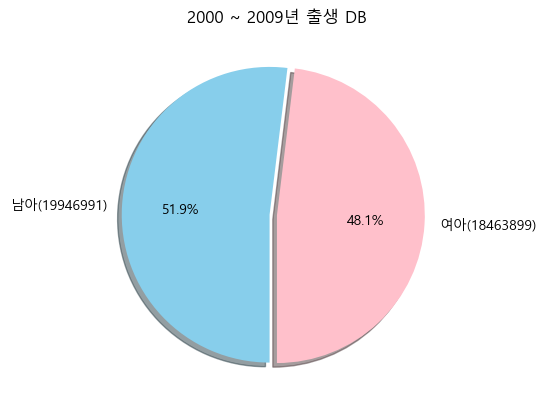

In [93]:
f, ax = plt.subplots(1,1)
labels = '여아(' + str(sex_sum[0])+')', '남아('+ str(sex_sum[1]) + ')'
sex_sum.plot.pie(autopct = '%1.1f%%', explode = (0, 0.05), shadow=True,
                startangle = -90, labels = labels,
                 colors = ['pink', 'skyblue'])
ax.set_title('2000 ~ 2009년 출생 DB')
ax.set_ylabel('')
plt.show()

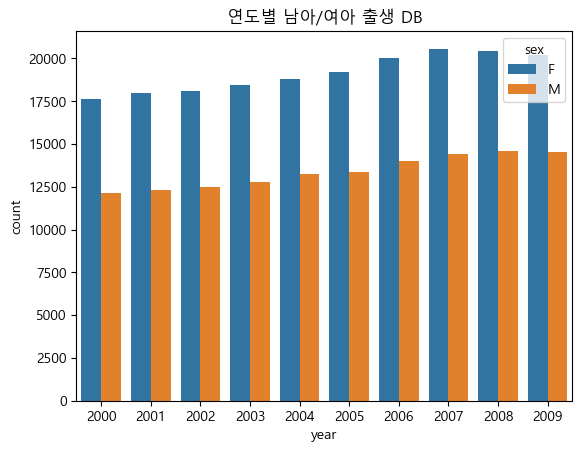

In [91]:
ax = plt.subplots()
ax = sns.countplot(x = 'year', hue = 'sex', data = baby_df)
ax.set_title('연도별 남아/여아 출생 DB')
plt.show()